## Sparsity Analysis
Paper: https://www.sciencedirect.com/science/article/pii/S0092867418307244?via%3Dihub

In [1]:
import os
from scipy import sparse
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/pbs.4361854.pbsha.ib.sockeye/matplotlib-6x83ujkf because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
paths = {
    'cite': '/arc/project/st-jiaruid-1/shenoy/data/multiome-sparse-rc/train_cite_inputs_raw_values.sparse.npz',
    'cite-target': '/arc/project/st-jiaruid-1/shenoy/data/multiome-sparse-rc/train_cite_targets_raw_values.sparse.npz',
    'multiome': '/arc/project/st-jiaruid-1/shenoy/data/multiome-sparse-rc/train_multi_inputs_raw_values.sparse.npz',
    'multiome-target': '/arc/project/st-jiaruid-1/shenoy/data/multiome-sparse-rc/train_multi_targets_raw_values.sparse.npz'
}

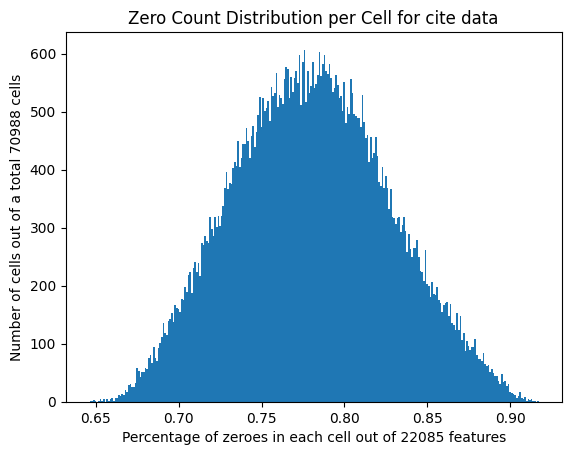

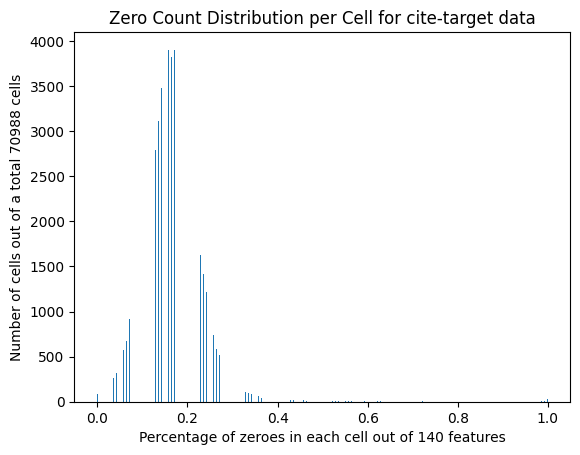

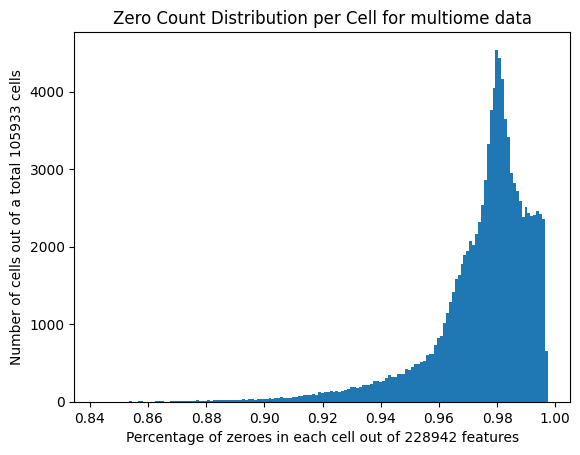

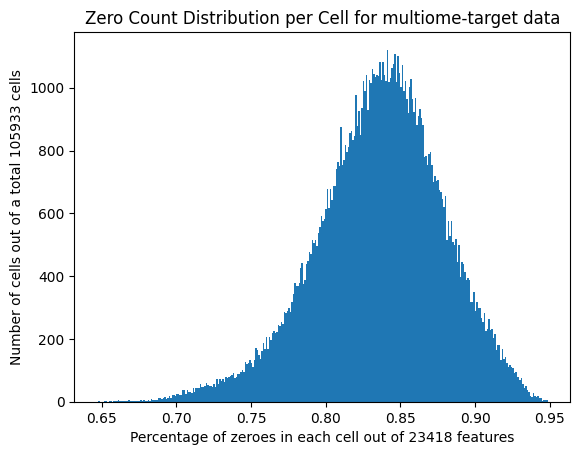

In [4]:
# plot for each 
for modality, path in paths.items():
    assert os.path.exists(path)
    x = sparse.load_npz(path)

    samples = x.shape[0]
    features = x.shape[1]
    zero_count_perc = 1 - ((x != 0) * 1.0).sum(1).A1 / features
    bins = np.arange(zero_count_perc.min() - 0.001, zero_count_perc.max() + 0.001, 0.001)
    plt.hist(zero_count_perc, bins)
    plt.title(f'Zero Count Distribution per Cell for {modality} data')
    plt.xlabel(f'Percentage of zeroes in each cell out of {features} features')
    plt.ylabel(f'Number of cells out of a total {samples} cells')
    plt.show()